<a href="https://colab.research.google.com/github/minotajordan/metaheuristic/blob/main/HC_HCRR_SA_mochila_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

myPath = "/content/sample_data/problems/"

In [ ]:
# Plot convergence curve
def plot_convergence_curve(fitness_history, p, alg):
  efos = np.arange(len(fitness_history))
  plt.title("Convergence curve for " + str(p))
  plt.xlabel("EFOs")
  plt.ylabel("Fitness")
  plt.plot(efos, fitness_history, label=str(alg))
  plt.legend()
  plt.show()

# Plot convergence curve comparison for two or more algorithms
def plot_convergence_curve_comparison(fitness_history, p, alg):
  efos = np.arange(len(fitness_history[0]))
  plt.title("Convergence curve for " + str(p))
  plt.xlabel("EFOs")
  plt.ylabel("Fitness")
  algorithms = len(fitness_history)
  for a in range(algorithms):
    plt.plot(efos, fitness_history[a], label=str(alg[a]))
  plt.legend()
  plt.show()

def print_alorithms_with_avg_fitness(alg, avg_fitness):
  rows = len(alg)
  for r in range(rows):
    print(alg[r] + " {0:12.6f}".format(avg_fitness[r]))

In [ ]:
class knapsack:
    def __init__(self, filename):
        self.name = os.path.basename(filename)
        self.name = os.path.splitext(self.name)[0]

        file1 = open(filename, 'r')
        lines = file1.readlines()

        firstline = lines[0].split(' ')

        self.size = int(firstline[0])
        self.capacity = float(firstline[1].strip())
        self.profits = np.zeros(self.size, dtype=float)
        self.weights = np.zeros(self.size, dtype=float)

        positionLine = 1
        for i in range(0, self.size):
            line = lines[positionLine].split(' ')
            self.profits[positionLine - 1] = float(line[0].replace(',', '.'))
            self.weights[positionLine - 1] = float(line[1].replace(',', '.'))
            positionLine = positionLine + 1
        self.OptimalKnown = float(lines[positionLine].replace(',', '.'))

        self.items = []
        for i in range(0, self.size):
            self.items.append([i, self.weights[i], self.profits[i],
                          self.profits[i] / self.weights[i]])

    def table_of_items(self):
        copy_of_items = self.items.copy()
        return copy_of_items

    def evaluate(self, cells):
        weight = (cells * self.weights).sum()
        fitness = -1
        if weight <= self.capacity:
            fitness = (cells * self.profits).sum()
        else:
            print('Error')
        return fitness, weight

    def __str__(self):
        return "file:" + str(self.name) + \
               "-size:" + str(self.size) + \
               "-opt:" + str(self.OptimalKnown)

In [ ]:
myP1 = knapsack(myPath +"f1.txt")
print (myP1)
print (myP1.table_of_items())

file:f1-size:10-opt:295.0
[[0, 95.0, 55.0, 0.5789473684210527], [1, 4.0, 10.0, 2.5], [2, 60.0, 47.0, 0.7833333333333333], [3, 32.0, 5.0, 0.15625], [4, 23.0, 4.0, 0.17391304347826086], [5, 72.0, 50.0, 0.6944444444444444], [6, 80.0, 8.0, 0.1], [7, 62.0, 61.0, 0.9838709677419355], [8, 65.0, 85.0, 1.3076923076923077], [9, 46.0, 87.0, 1.891304347826087]]


In [ ]:
class solution:
    def __init__(self, p: knapsack):
        self.problem = p
        self.cells = np.zeros(self.problem.size, int)
        self.fitness = 0.0
        self.weight = 0.0

    def from_solution(self, origin):
        self.problem = origin.problem
        self.cells = np.copy(origin.cells)
        self.fitness = origin.fitness
        self.weight = origin.weight

    def evaluate(self):
        self.fitness, self.weight = self.problem.evaluate(self.cells)

    def Initialization(self):
        positions = np.random.choice(self.problem.size, self.problem.size, replace=False)
        self.cells = np.zeros(self.problem.size, int)
        self.add_items_while_keep_capacity(positions, 0)
        self.evaluate()

    def add_items_while_keep_capacity(self, positions, weight):
        self.weight = weight
        for p in positions:
            if self.weight + self.problem.weights[p] < self.problem.capacity:
                self.cells[p] = 1
                self.weight += self.problem.weights[p]

    def tweak(self):
        selectedPositions = np.where(self.cells == 1)[0]
        unselectedPositions = np.where(self.cells == 0)[0]
        x = np.random.randint(len(selectedPositions), size=1)
        elementToRemove = selectedPositions[x[0]]
        self.cells[elementToRemove] = 0
        self.weight = self.weight - self.problem.weights[elementToRemove]
        self.fitness = self.fitness - self.problem.profits[elementToRemove]
        self.complete(unselectedPositions, False)

    def complete(self, unselectedPositions, calculatePositions):
        if calculatePositions:
            unselectedPositions = np.where(self.cells == 0)[0]

        empty = self.problem.capacity - self.weight
        while empty > 0 and len(unselectedPositions) > 0:
            fitUnselected = np.array([unselectedPositions, self.problem.weights[unselectedPositions]])
            fitUnselected = fitUnselected[:, np.where(fitUnselected[1, :] < empty)][0]
            unselectedPositions = np.copy(fitUnselected[0])
            if len(fitUnselected[0]) == 0:
                break
            elementToAdd = int(fitUnselected[0][np.random.randint(len(fitUnselected[0]))])
            self.cells[elementToAdd] = 1
            self.weight = self.weight + self.problem.weights[elementToAdd]
            self.fitness = self.fitness + self.problem.profits[elementToAdd]
            unselectedPositions = np.array(unselectedPositions[np.where(unselectedPositions != elementToAdd)],
                                           dtype=int)
            empty = self.problem.capacity - self.weight

    def __str__(self):
        result = "Cells:" + str(self.cells) + \
                 "-fitness:" + str(self.fitness)
        return result


In [ ]:
myP1 = knapsack(myPath +"f1.txt")
print (myP1)

s1 = solution (myP1)
s1.Initialization()
print(s1)

s2 = solution (myP1)
s2.from_solution(s1)

print(s2)
s2.tweak()
print(s2)

file:f1-size:10-opt:295.0
Cells:[1 1 0 1 0 1 0 1 0 0]-fitness:181.0
Cells:[1 1 0 1 0 1 0 1 0 0]-fitness:181.0
Cells:[1 1 0 1 0 0 0 1 1 0]-fitness:216.0


In [ ]:
class HC:
    def __init__(self, max_efos: int):
        self.max_efos = max_efos

    def evolve(self, seed: int, problem):
        self.problem = problem
        np.random.seed (seed)
        best_fitness_history = np.zeros(self.max_efos, float)

        self.best = solution(self.problem)
        self.best.Initialization()
        best_fitness_history[0] = self.best.fitness

        S = self.best # S is a pointer to self.best, not a full copy
        for iteration in range(1, self.max_efos):
            R = solution(S.problem)
            R.from_solution(S) # R is a full copy of S
            R.tweak()
            if R.fitness > S.fitness:
                S.from_solution(R)
            best_fitness_history[iteration] = self.best.fitness
        return best_fitness_history

    def __str__(self):
        result = "HC:"
        return result

file:f1-size:10-opt:295.0
[161. 161. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199.
 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 241. 241. 241.
 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246.
 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246.
 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246. 246.
 252. 252. 252. 252. 252. 294. 294. 294. 294. 294. 294. 294. 294. 294.
 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294.
 294. 294.]


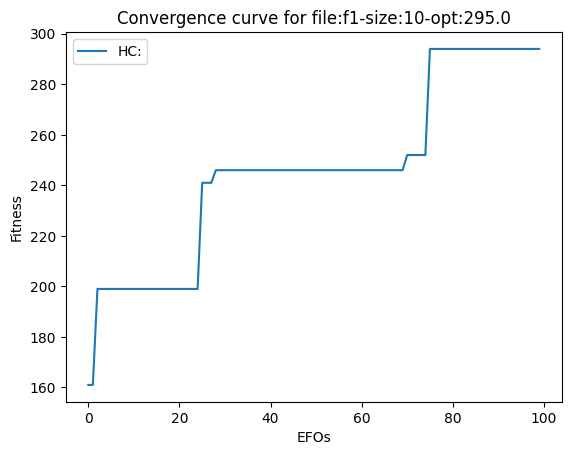

Cells:[0 1 1 0 1 0 0 1 1 1]-fitness:294.0


In [ ]:
myP1 = knapsack(myPath +"f1.txt")
print (myP1)
max_efos = 100
hc = HC(max_efos = max_efos)
r1 = hc.evolve(seed=1, problem=myP1)
print(r1)
plot_convergence_curve(r1, myP1, hc)
print (hc.best)

In [ ]:
class HCRR:
    def __init__(self, max_efos: int, max_local: int):
        self.max_efos = max_efos
        self.max_local = max_local

    def evolve(self, seed: int, problem):
        self.problem = problem
        np.random.seed (seed)
        best_fitness_history = np.zeros(self.max_efos, float)
        efos = 0
        while efos < self.max_efos:
          S = solution(problem) # S is a new Solution
          S.Initialization() # Random initialization and calculating fitness
          if efos == 0:
            self.best = solution(problem)
            self.best.from_solution(S) # self.best is a full copy of S
            best_fitness_history[0] = self.best.fitness
          # Perform the hill climbig optimization (local)
          for opt in range(1, self.max_local):
              R = solution(S.problem)
              R.from_solution(S) # R is a full copy of S
              R.tweak() # Tweeking and calculating fitness
              if R.fitness > S.fitness:
                  S.from_solution(R)
              if S.fitness > self.best.fitness:
                  self.best.from_solution(S) # self.best is a full copy of S
              best_fitness_history[efos] = self.best.fitness
              efos+=1
              if efos >= self.max_efos:
                break
        return best_fitness_history

    def __str__(self):
        result = "HCRR-maxlocal:" + str(self.max_local)
        return result

file:f1-size:10-opt:295.0
[161. 199. 199. 199. 199. 199. 199. 199. 199. 241. 241. 241. 241. 241.
 241. 241. 241. 241. 241. 241. 241. 241. 241. 241. 241. 246. 246. 246.
 246. 259. 259. 259. 259. 259. 259. 259. 259. 259. 259. 279. 279. 279.
 279. 279. 279. 279. 279. 279. 279. 279. 279. 294. 294. 294. 294. 294.
 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294.
 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294.
 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294.
 294. 294.]


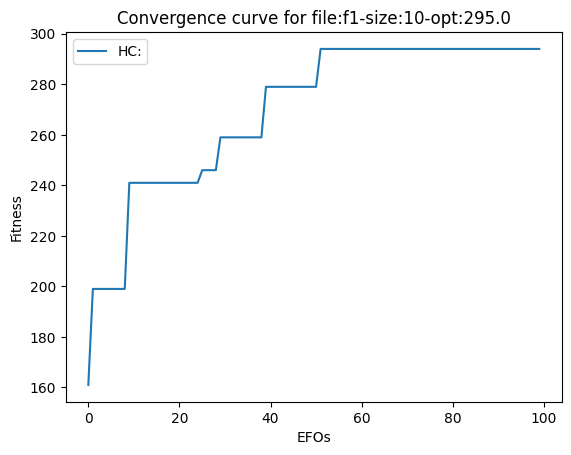

Cells:[0 1 1 0 1 0 0 1 1 1]-fitness:294.0


In [ ]:
myP1 = knapsack(myPath +"f1.txt")
print (myP1)
max_efos = 100
max_local = 10
hcrr = HCRR(max_efos = max_efos, max_local=max_local)
r2 = hcrr.evolve(seed=1, problem=myP1)
print(r2)
plot_convergence_curve(r2, myP1, hc)
print (hcrr.best)

In [ ]:
class SA:
    def __init__(self, max_efos: int):
        self.max_efos = max_efos

    def evolve(self, seed: int, problem):
        to = 100
        self.problem = problem
        np.random.seed (seed)
        best_fitness_history = np.zeros(self.max_efos, float)

        S = solution(self.problem)
        S.Initialization()
        best_fitness_history[0] = S.fitness
        self.best = solution(self.problem)
        self.best.from_solution(S) # self.best is a full copy of S
        t= to
        for iteration in range(1, self.max_efos):
            R = solution(S.problem)
            R.from_solution(S) # R is a full copy of S
            R.tweak()
            t = t - to/(self.max_efos + 1)
            ale = np.random.uniform()
            prob = math.exp((R.fitness - S.fitness) / t)
            if R.fitness > S.fitness or ale < prob:
                S.from_solution(R)
            if S.fitness > self.best.fitness:
                self.best.from_solution(S)
            best_fitness_history[iteration] = self.best.fitness
        return best_fitness_history

    def __str__(self):
        result = "SA"
        return result

file:f1-size:10-opt:295.0
[161. 199. 199. 199. 199. 199. 199. 199. 199. 241. 241. 241. 241. 241.
 241. 241. 241. 241. 241. 241. 241. 241. 241. 241. 241. 246. 246. 246.
 246. 259. 259. 259. 259. 259. 259. 259. 259. 259. 259. 279. 279. 279.
 279. 279. 279. 279. 279. 279. 279. 279. 279. 294. 294. 294. 294. 294.
 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294.
 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294.
 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294. 294.
 294. 294.]


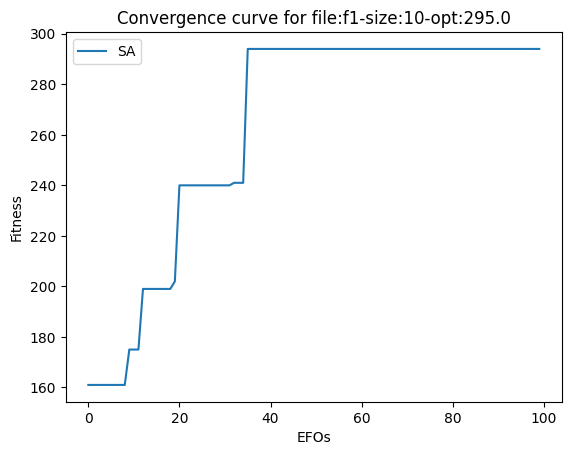

Cells:[0 1 1 0 1 0 0 1 1 1]-fitness:294.0


In [ ]:
myP1 = knapsack(myPath +"f1.txt")
print (myP1)
max_efos = 100
sa = SA(max_efos = max_efos)
r3 = sa.evolve(seed=1, problem=myP1)
print(r2)
plot_convergence_curve(r3, myP1, sa)
print (sa.best)

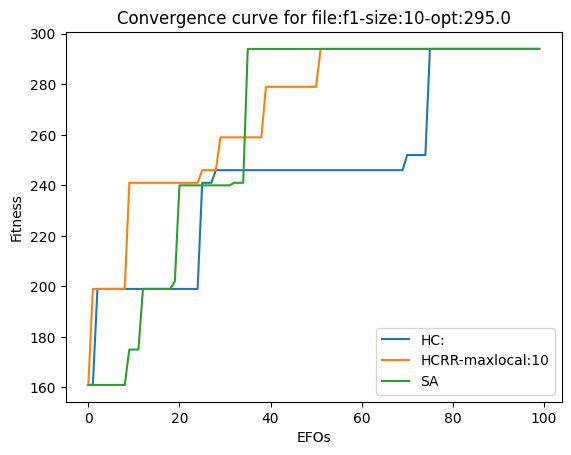

In [ ]:
results = [r1, r2, r3]
alg =[str(hc), str(hcrr), str(sa)]
plot_convergence_curve_comparison(results, myP1, alg)

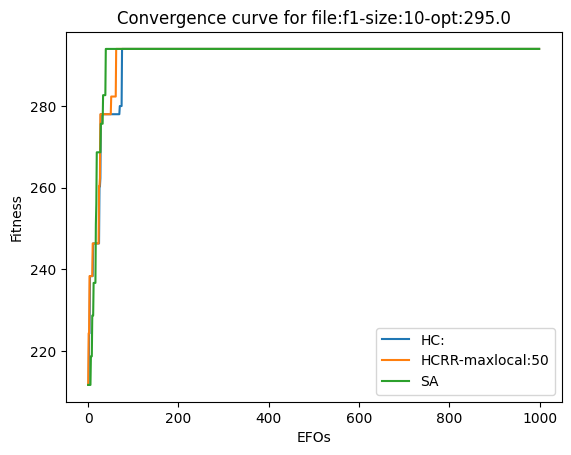

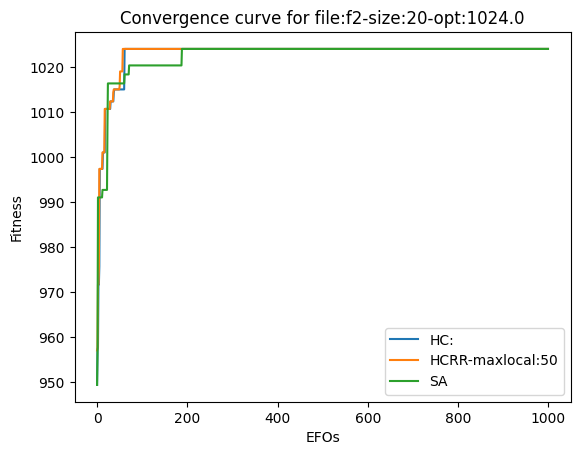

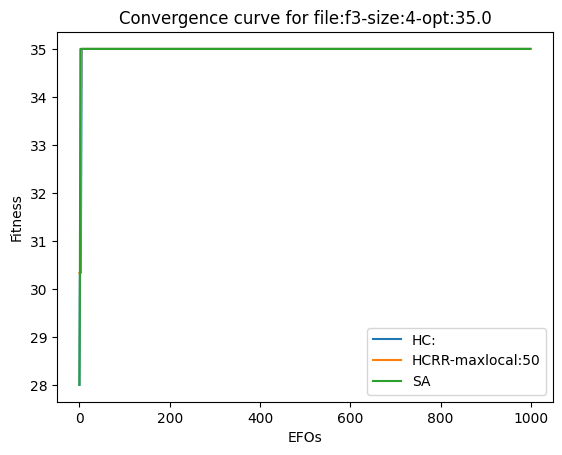

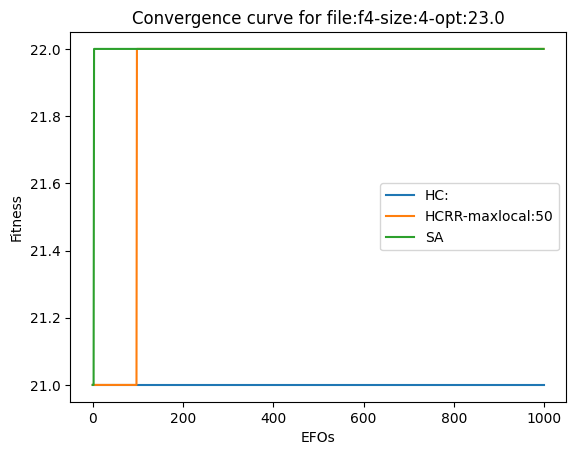

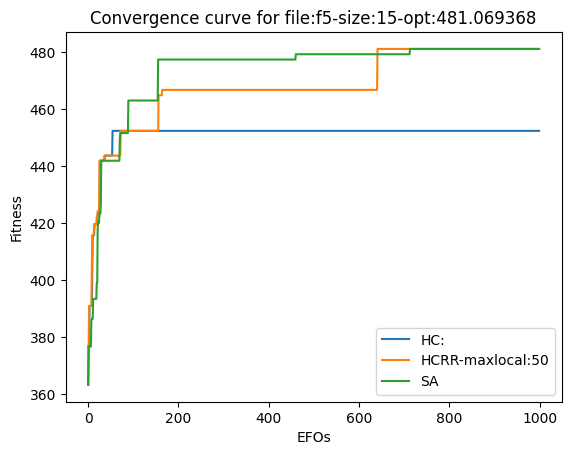

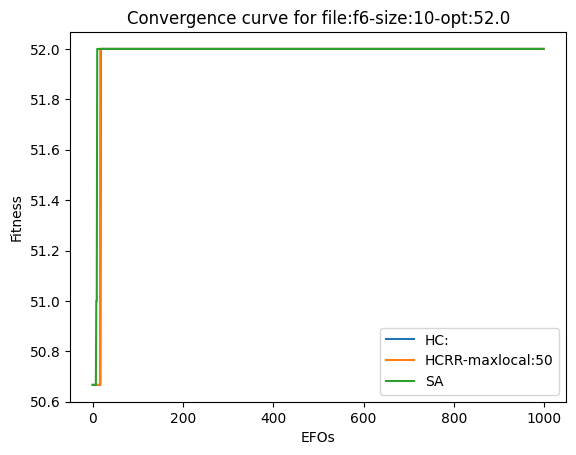

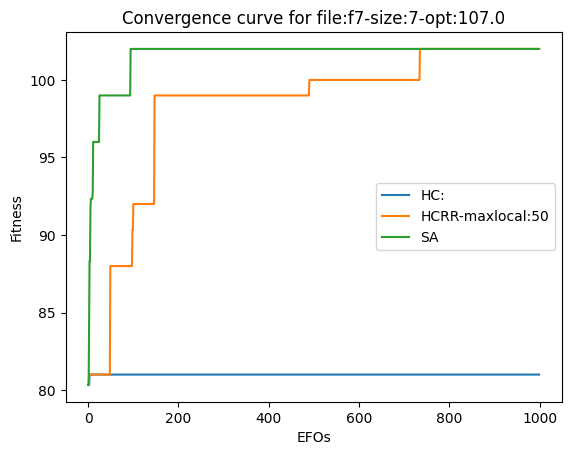

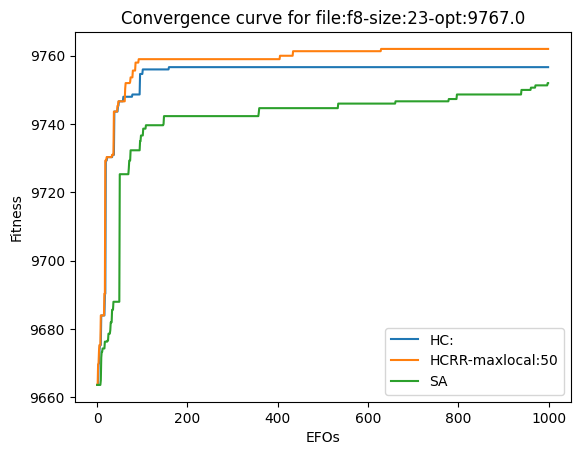

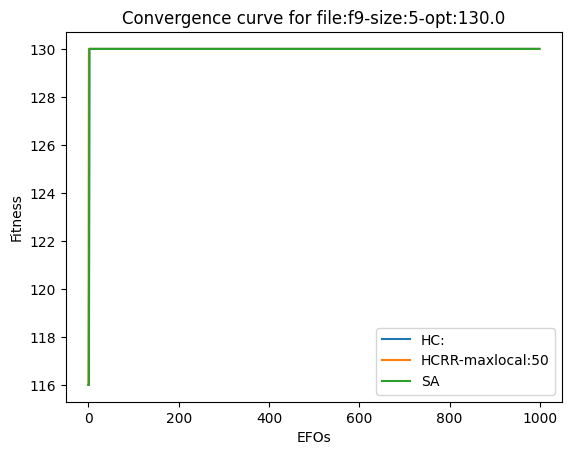

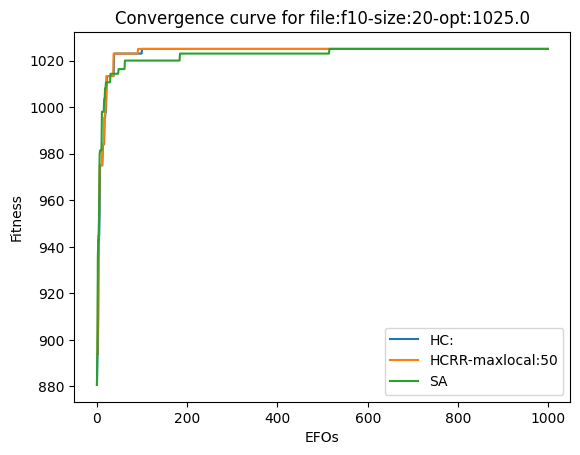

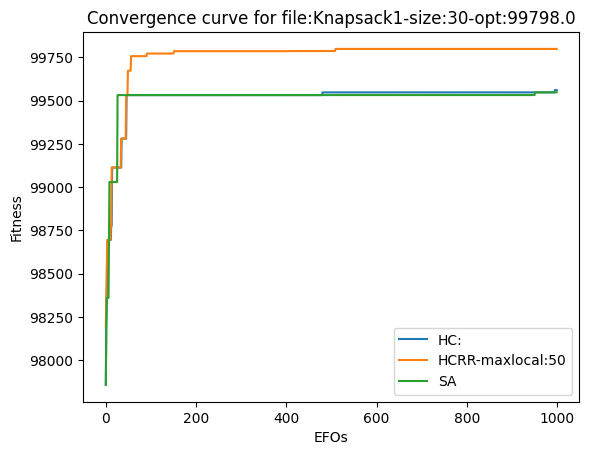

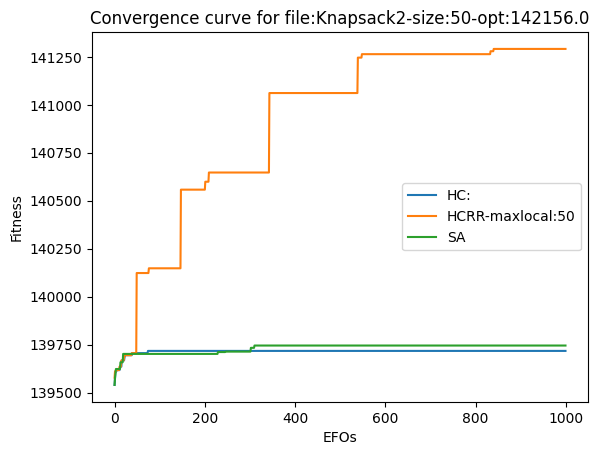

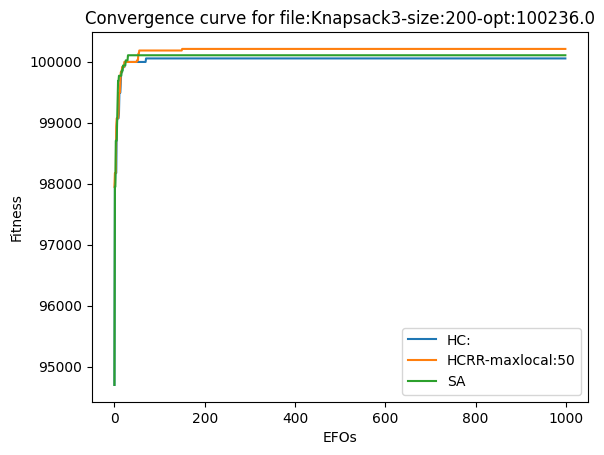

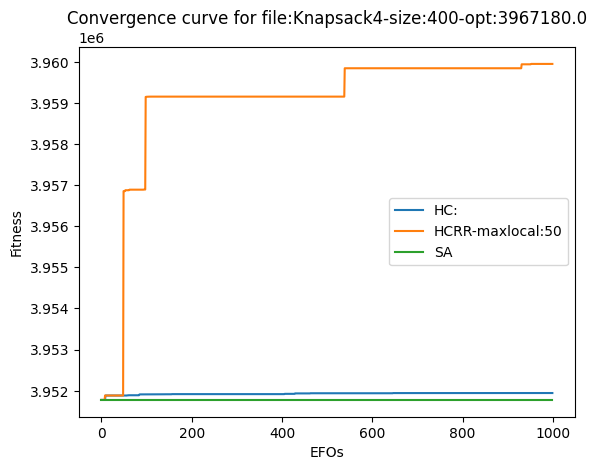

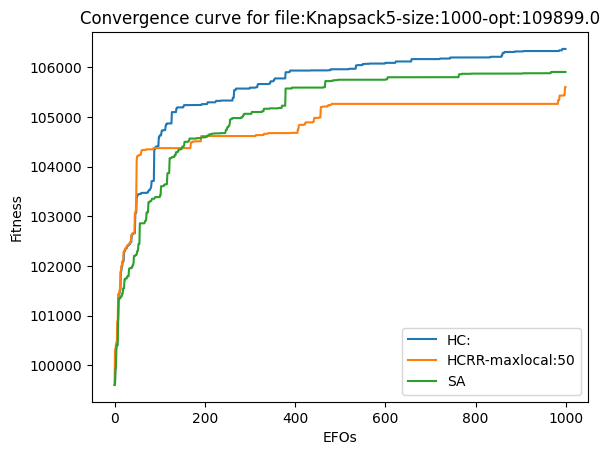

Promedios:
                                  Problem                  HC  \
0               file:f1-size:10-opt:295.0               294.0   
1              file:f2-size:20-opt:1024.0              1024.0   
2                 file:f3-size:4-opt:35.0                35.0   
3                 file:f4-size:4-opt:23.0                21.0   
4          file:f5-size:15-opt:481.069368          452.312794   
5                file:f6-size:10-opt:52.0                52.0   
6                file:f7-size:7-opt:107.0                81.0   
7              file:f8-size:23-opt:9767.0   9756.666666666666   
8                file:f9-size:5-opt:130.0               130.0   
9             file:f10-size:20-opt:1025.0              1025.0   
10     file:Knapsack1-size:30-opt:99798.0             99560.0   
11    file:Knapsack2-size:50-opt:142156.0            139717.0   
12   file:Knapsack3-size:200-opt:100236.0            100054.0   
13  file:Knapsack4-size:400-opt:3967180.0  3951943.6666666665   
14  file:Knaps

In [ ]:
max_efos = 1000
max_local = 50
repetitions = 3
myP1 = knapsack(myPath +"f1.txt")
myP2 = knapsack(myPath +"f2.txt")
myP3 = knapsack(myPath +"f3.txt")
myP4 = knapsack(myPath +"f4.txt")
myP5 = knapsack(myPath +"f5.txt")
myP6 = knapsack(myPath +"f6.txt")
myP7 = knapsack(myPath +"f7.txt")
myP8 = knapsack(myPath +"f8.txt")
myP9 = knapsack(myPath +"f9.txt")
myP10 = knapsack(myPath +"f10.txt")
myP11 = knapsack(myPath +"Knapsack1.txt")
myP12 = knapsack(myPath +"Knapsack2.txt")
myP13 = knapsack(myPath +"Knapsack3.txt")
myP14 = knapsack(myPath +"Knapsack4.txt")
myP15 = knapsack(myPath +"Knapsack5.txt")
problems = [myP1, myP2, myP3, myP4, myP5, myP6, myP7, myP8,
            myP9, myP10, myP11, myP12, myP13, myP14, myP15]

hc = HC(max_efos = max_efos)
hcrr = HCRR(max_efos= max_efos, max_local = max_local)
sa = SA(max_efos = max_efos)
algorithms = [hc, hcrr, sa]

df = pd.DataFrame({'Problem': pd.Series(dtype='str'),
                   'HC': pd.Series(dtype='float'),
                   'HCRR': pd.Series(dtype='float'),
                   'SA': pd.Series(dtype='float')})
df2 = pd.DataFrame({'Problem': pd.Series(dtype='str'),
                   'HC': pd.Series(dtype='float'),
                   'HCRR': pd.Series(dtype='float'),
                   'SA': pd.Series(dtype='float')})
for p in problems:

  names_alg = []
  avg_curve_alg = []
  best_avg_fitness_alg = []
  best_std_fitness_alg = []

  for alg in algorithms:
    avg_curve = np.zeros(max_efos, float)
    best_fitnes = np.zeros(repetitions, float)

    for s in range(0, repetitions):
      curve_data = alg.evolve(seed=s, problem=p)
      avg_curve = avg_curve + curve_data
      best_fitnes[s] = alg.best.fitness

    avg_curve = avg_curve/ repetitions
    avg_best_fitnes = np.average(best_fitnes)
    std_best_fitnes = np.std(best_fitnes)

    names_alg.append(str(alg))
    avg_curve_alg.append(avg_curve)
    best_avg_fitness_alg.append(avg_best_fitnes)
    best_std_fitness_alg.append(std_best_fitnes)

  plot_convergence_curve_comparison(avg_curve_alg, p, names_alg)

  new_row = pd.DataFrame({'Problem': str(p),
                          'HC':str(best_avg_fitness_alg[0]),
                          'HCRR':str(best_avg_fitness_alg[1]),
                          'SA':str(best_avg_fitness_alg[2])}, index=[0])
  df = pd.concat([df.loc[:], new_row]).reset_index(drop=True)

  new_row2 = pd.DataFrame({'Problem': str(p),
                           'HC':str(best_std_fitness_alg[0]),
                           'HCRR':str(best_std_fitness_alg[1]),
                           'SA':str(best_std_fitness_alg[2])}, index=[0])
  df2 = pd.concat([df2.loc[:], new_row2]).reset_index(drop=True)

print("Promedios:")
print(df)
print("Desviaciones Estandar:")
print(df2)

In [ ]:
df.to_csv("avgs.csv", index=False)